# Assignment 1


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from astsadata import *
import warnings
warnings.filterwarnings('ignore')

## About the two time series datasets

• The Oil DataFrame:

    contains 545 entries representing oil prices in dollars per barrel. It has a weekly index frequency ending on Sunday (W-SUN) and spans from December 27, 1999 / January 2, 2000 to June 14-20, 2010.

• The Gas DataFrame:

    also contains 545 entries, representing gas prices in cents per gallon. It shares the same characteristics as the Oil DataFrame: 545 entries in a single column, weekly frequency ending on Sunday, spanning from December 27, 1999 / January 2, 2000 to June 14-20, 2010.

In [14]:
oil.info()
oil.head()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


,value
index,
1999-12-27/2000-01-02,26.20
2000-01-03/2000-01-09,26.07
2000-01-10/2000-01-16,26.34
2000-01-17/2000-01-23,24.95
2000-01-24/2000-01-30,26.27


In [15]:
gas.info()
gas.head()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


,value
index,
1999-12-27/2000-01-02,70.636
2000-01-03/2000-01-09,71.040
2000-01-10/2000-01-16,68.490
2000-01-17/2000-01-23,65.137
2000-01-24/2000-01-30,67.918


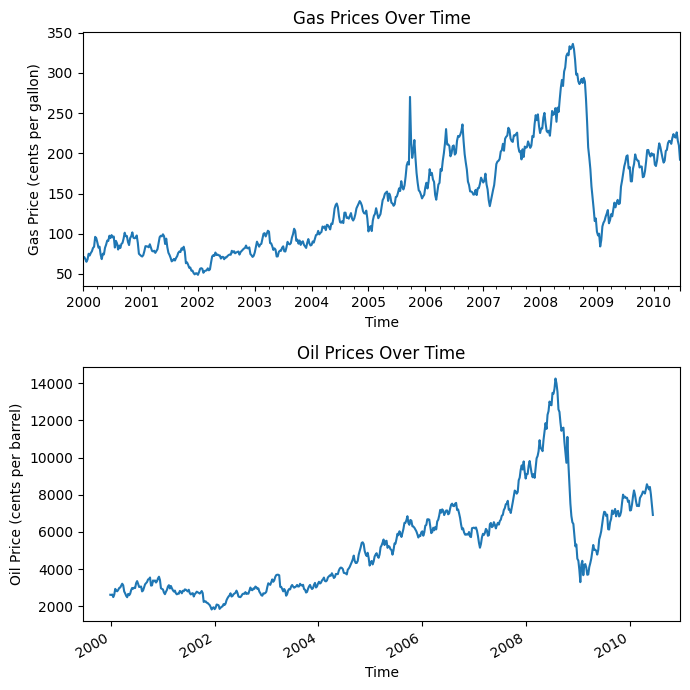

In [23]:
# Convert oil prices to cents for comparison
oil_in_cents = oil * 100

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(7, 7))  # Adjusted figsize

# Plot gas prices
gas.plot(ax=axes[0], xlabel='Time', ylabel='Gas Price (cents per gallon)', title="Gas Prices Over Time", legend=False)

# Plot oil prices in cents
oil_in_cents.plot(ax=axes[1], xlabel='Time', ylabel='Oil Price (cents per barrel)', title="Oil Prices Over Time", legend=False)

# Adjust layout for clarity
fig.tight_layout()

# Display the plot
plt.show()


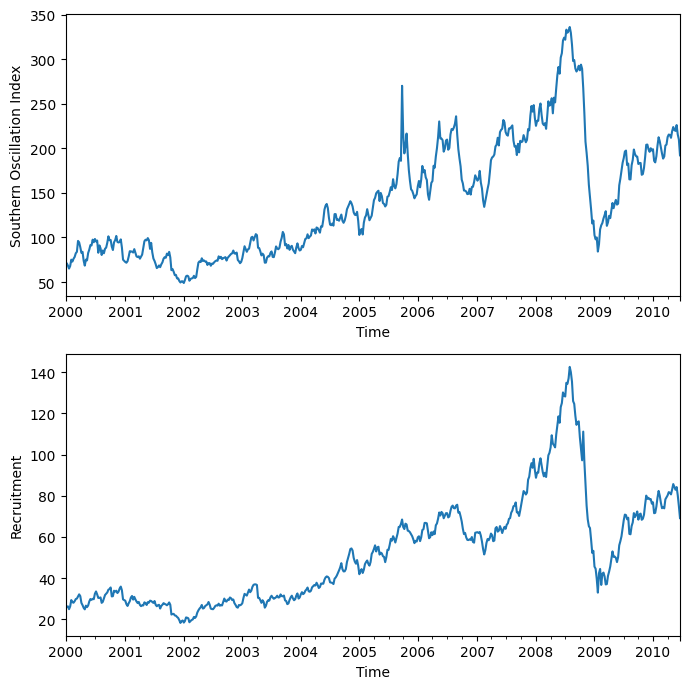

In [7]:
# Time series plots

fig, axes = plt.subplots(nrows=2, figsize=(7, 7))  # Adjusted figsize

gas.plot(ax=axes[0], xlabel='Time', ylabel='Southern Oscillation Index', legend=False)
oil.plot(ax=axes[1], xlabel='Time', ylabel='Recruitment', legend=False)
fig.tight_layout()
plt.show()


Question 2 - Plot both time series in one frame

In order to address the different units of the two dataframes, there are two approaches:
The first approach does not convert one unit to another. Instead, it creates two y-axes: a primary axis for oil (dollars per barrel) and a secondary axis for gas (cents per gallon).
The second approach converts gas prices from cents per gallon to dollars per barrel. This is done in two steps:
a) Converting cents to dollars (dividing by 100, as there are 100 cents in one dollar)
b) Converting gallons to barrels (multiplying by 42, as there are 42 gallons in one barrel)
After conversion, both series are plotted on the same axis.

In [ ]:
# Approach 1: Plot oil prices on primary y-axis & creating a secondary y-axis for gas prices

import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(oil.index.to_timestamp(), oil['value'], color='blue', label='Oil ($/barrel)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Price ($/barrel)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(gas.index.to_timestamp(), gas['value'], color='green', label='Gas (cents/gallon)')
ax2.set_ylabel('Gas Price (cents/gallon)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Oil and Gas Prices (1999-2010)')
plt.show()

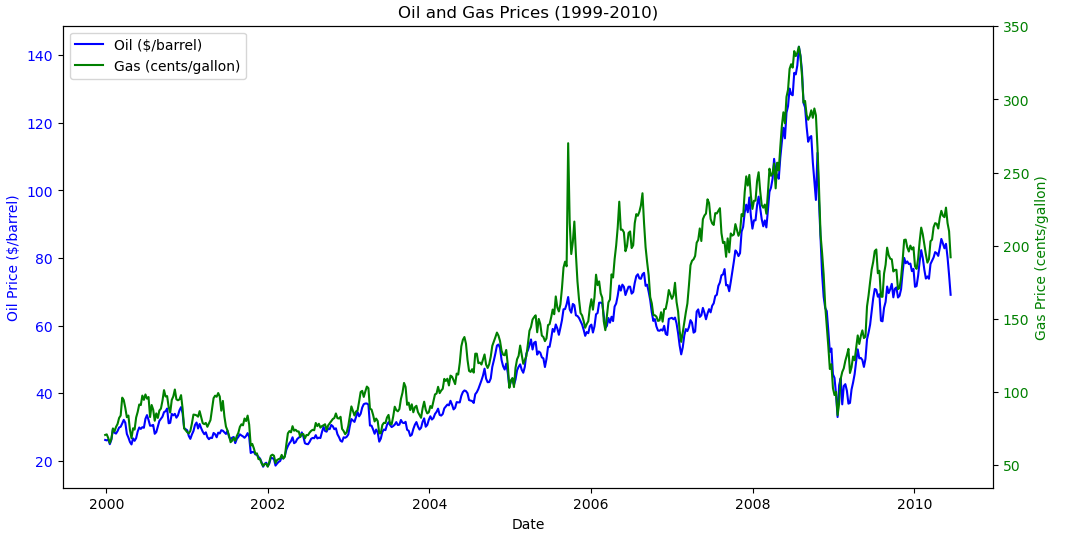

In [ ]:
# Approach 2: Convert gas prices from cents/gallon to $/barrel (by first converting cents to $ (there are 100 cents in one $) and then converting gallons to barrels (there are 42 gallons in one barrel)) and plot both series on the same axis:


import matplotlib.pyplot as plt

gas['value_converted'] = (gas['value'] / 100) * 42  # 100 cents/dollar, 42 gallons/barrel

plt.figure(figsize=(12, 6))
plt.plot(oil.index.to_timestamp(), oil['value'], label='Oil ($/barrel)')
plt.plot(gas.index.to_timestamp(), gas['value_converted'], label='Gas ($/barrel equivalent)')
plt.xlabel('Date')
plt.ylabel('Price ($/barrel)')
plt.title('Oil and Gas Prices (1999-2010)')
plt.legend()
plt.show()

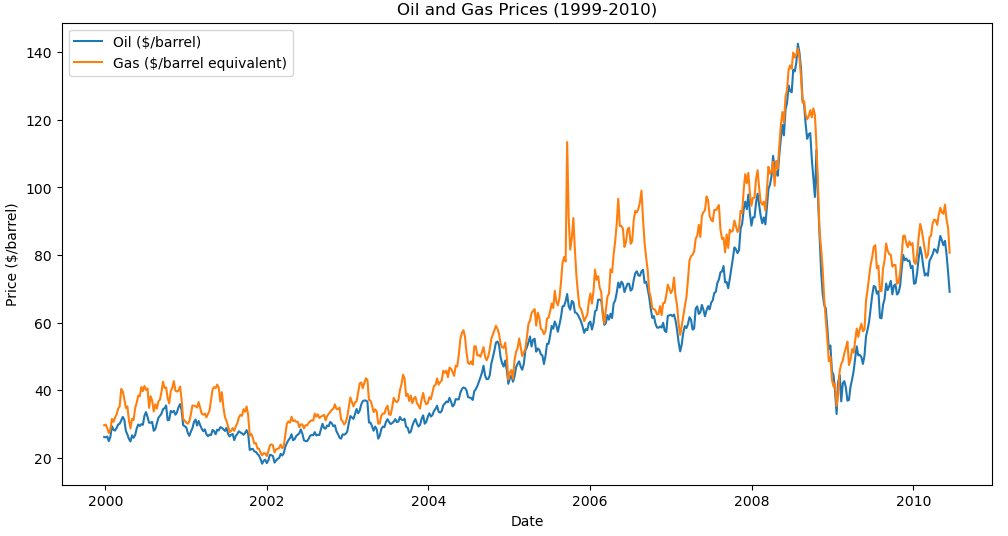